In [1]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import time
%matplotlib inline
import tensorflow
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.layers.advanced_activations import LeakyReLU, PReLU
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
import pandas

Using TensorFlow backend.


In [2]:
import keras
import tensorflow

In [3]:
t=time.time()
train_data = np.array(list(np.loadtxt("train2.csv", delimiter=","))).astype("float32")
train_labels = np.array(list(np.loadtxt("train_label.csv", delimiter=","))).astype("float32")
eval_data = np.array(list(np.loadtxt("eval2.csv", delimiter=","))).astype("float32")
eval_labels = np.array(list(np.loadtxt("eval_label.csv", delimiter=","))).astype("float32")

#eval_data = pandas.read_csv("eval.csv", delimiter=",",header=None,dtype='float32')
#eval_labels = pandas.read_csv("eval_label.csv", delimiter=",",header=None,dtype='float32')
print(time.time()-t)

206.39482855796814


In [19]:
t=time.time()
test_data = np.array(list(np.loadtxt("test1_0.5L.csv", delimiter=","))).astype("float32")
test_labels = np.array(list(np.loadtxt("test1_0.5_label.csv", delimiter=","))).astype("float32")
print(time.time()-t)

50.534212589263916


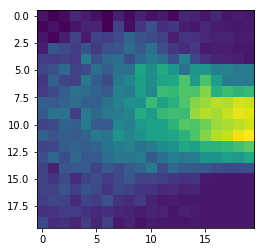

0.8348895
[1.        0.9875887 0.95      1.       ] [0.9973831  0.98738945 0.95       1.        ] [0.9821002  0.98918223 0.95       1.        ]
(64000, 4) (64000, 24, 24, 2)


In [20]:
x_train = train_data.reshape(-1, 24,24,2)
x_val = eval_data.reshape(-1, 24,24,2)
x_test = test_data.reshape(-1, 24,24,2)

y_train=np.abs(np.reshape(train_labels,(-1,4)))
y_val=np.abs(np.reshape(eval_labels,(-1,4)))
y_test=np.abs(np.reshape(test_labels,(-1,4)))

plt.imshow(-np.reshape(test_labels,(20,20,100,4))[:,:,98,0])
plt.show()
y_max=max(np.max(y_train[:,0]),np.max(y_val[:,0]))  #maximum observed chirality
y_train[:,0]=y_train[:,0]/y_max
y_val[:,0]=y_val[:,0]/y_max
y_test[:,0]=y_test[:,0]/y_max
print(y_max)
print(np.amax(y_train,axis=0),np.amax(y_val,axis=0),np.amax(y_test,axis=0))
print(np.shape(y_train),np.shape(x_train))

In [6]:
model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (6, 6), activation='relu', input_shape = (24, 24, 2)))
model.add(BatchNormalization())
#model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))
#model.add(BatchNormalization())
#model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
#model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
#model.add(BatchNormalization())
#model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='linear'))
model.add(LeakyReLU(alpha=.1))
model.add(Dropout(0.25))

model.add(Dense(1024, activation='linear'))
model.add(LeakyReLU(alpha=.1))
model.add(Dropout(0.5))

model.add(Dense(4, activation='sigmoid'))

In [7]:
model.compile(loss='mean_squared_error', optimizer = Adam(lr=1e-4))#, metrics=["accuracy"]) #binary_crossentropy

In [8]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [9]:
hist = model.fit(x=x_train, y=y_train, batch_size=512,
                           epochs=20, #Increase this when not on Kaggle kernel
                           verbose=2,  #1 for ETA, 0 for silent
                           validation_data=(x_val, y_val), #For speed
                           callbacks=[annealer])

Train on 64000 samples, validate on 16000 samples
Epoch 1/20
 - 100s - loss: 0.0278 - val_loss: 0.0213
Epoch 2/20
 - 97s - loss: 0.0096 - val_loss: 0.0068
Epoch 3/20
 - 97s - loss: 0.0078 - val_loss: 0.0123
Epoch 4/20
 - 97s - loss: 0.0067 - val_loss: 0.0221
Epoch 5/20
 - 98s - loss: 0.0061 - val_loss: 0.0235
Epoch 6/20
 - 96s - loss: 0.0057 - val_loss: 0.0152
Epoch 7/20
 - 97s - loss: 0.0053 - val_loss: 0.0106
Epoch 8/20
 - 96s - loss: 0.0052 - val_loss: 0.0077
Epoch 9/20
 - 101s - loss: 0.0050 - val_loss: 0.0058
Epoch 10/20
 - 96s - loss: 0.0049 - val_loss: 0.0045
Epoch 11/20
 - 95s - loss: 0.0048 - val_loss: 0.0048
Epoch 12/20
 - 96s - loss: 0.0046 - val_loss: 0.0048
Epoch 13/20
 - 99s - loss: 0.0046 - val_loss: 0.0041
Epoch 14/20
 - 100s - loss: 0.0045 - val_loss: 0.0042
Epoch 15/20
 - 98s - loss: 0.0044 - val_loss: 0.0044
Epoch 16/20
 - 57s - loss: 0.0043 - val_loss: 0.0040
Epoch 17/20
 - 57s - loss: 0.0043 - val_loss: 0.0039
Epoch 18/20
 - 56s - loss: 0.0043 - val_loss: 0.0037
Ep

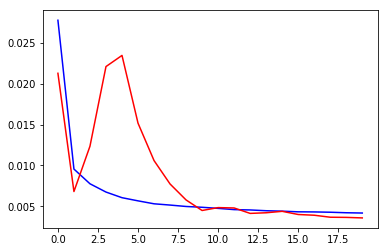

In [10]:
plt.plot(hist.history['loss'], color='b')
plt.plot(hist.history['val_loss'], color='r')
plt.show()

In [11]:
y_hat = model.predict(x_val)

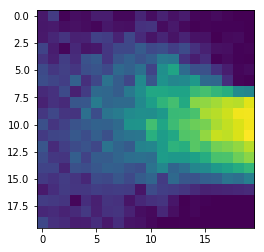

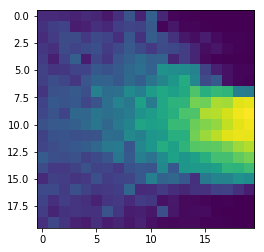

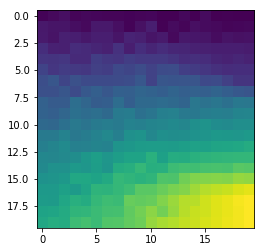

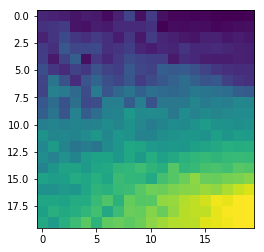

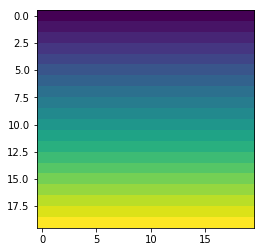

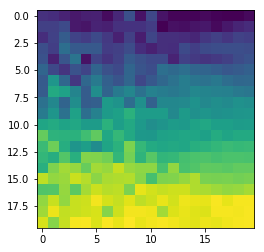

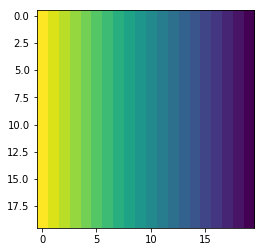

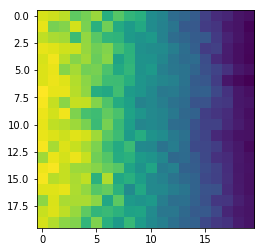

(20, 20, 40, 4)


In [12]:
y_val=np.reshape(y_val,(20,20,40,4))
y_hat=np.reshape(y_hat,(20,20,40,4))

plt.imshow(y_val[:,:,20,0])
plt.show()
plt.imshow(y_hat[:,:,20,0])
plt.show()

plt.imshow(y_val[:,:,20,1])
plt.show()
plt.imshow(y_hat[:,:,20,1])
plt.show()

plt.imshow(y_val[:,:,20,2])
plt.show()
plt.imshow(y_hat[:,:,20,2])
plt.show()

plt.imshow(y_val[:,:,20,3])
plt.show()
plt.imshow(y_hat[:,:,20,3])
plt.show()

print(np.shape(y_hat))

In [21]:
y_hat = model.predict(x_test)

In [22]:
#Error Analysis
y_hat=np.reshape(y_hat,(-1,4))
y_test=np.reshape(y_test,(-1,4))
n=np.shape(y_test)[0]

print(np.mean(y_hat-y_test,axis=0))

print((np.sum((y_hat-y_test)**2,axis=0)/(n))**0.5)

[ 0.029628    0.04732653  0.08532424 -0.0227614 ]
[0.08221308 0.07491089 0.11373401 0.06349058]


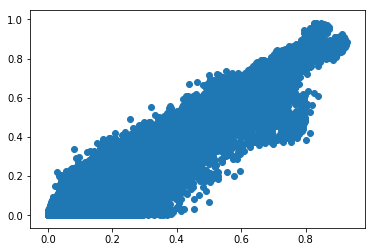

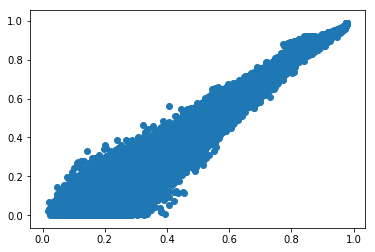

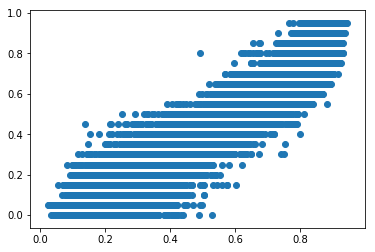

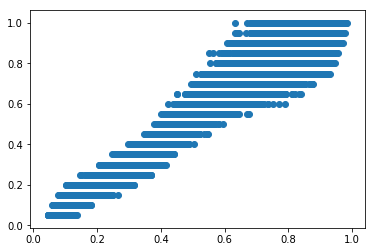

In [23]:
for i in range(4):
    plt.show(plt.scatter(y_hat[:,i],y_test[:,i]))

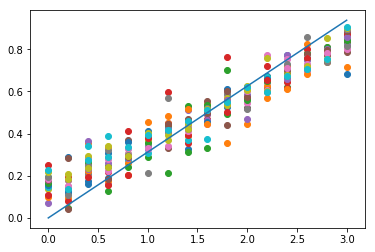

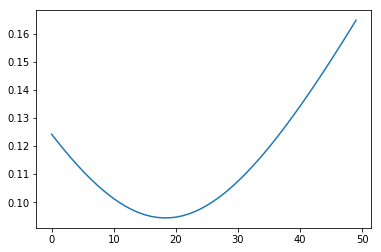

In [36]:
y_test=np.reshape(y_test,(20,20,100,4))
y_hat=np.reshape(y_hat,(20,20,100,4))
x=np.arange(0,4,4/20)
key=16
plt.plot(x[:key],1.25*y_test[:key,i,15,2])
for i in range(20):
    plt.scatter(x[:key],y_hat[:key,i,20,2])
plt.show()
hist=[]
for m in np.arange(1,1.5,0.01):
    hist.append((np.sum((m*y_test[:key,:,:,2]-y_hat[:key,:,:,2])**2)/(key*20*100))**0.5)
plt.plot(hist)